# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.


In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import time
import os
os.environ["CUDA_DEVICE_ORDER"]='PCI_BUS_ID'
os.environ["CUDA_VISIBLE_DEVICES"]="1"
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


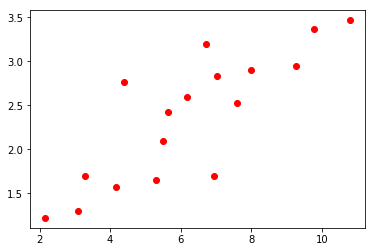

In [4]:
#show data
plt.plot(train_X, train_Y, 'ro', label='Original data')

## Learn a linear regression to fit the dataset
y_pred = w*x+b

We learn w and b from the dataset

## Two phase to write your tf program
### Build a model (assemble a graph)
1. Define placeholders for input and output (label)
2. Define the weight
3. Define the inference model
4. Define loss function
5. Define optimizer

### Training (Use a session to execute operations in the graph)
1. Initialize model parameters
2. Input training data
3. Execute inference model on training data
4. Compute loss
5. Adust mode parameters to minimize the loss
6. Repeat 2->5 util loss convergence



### linear regression v1

In [5]:
tf.reset_default_graph()
# define the input by placeholder
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32,name='x')
    y = tf.placeholder(tf.float32,name='y')
# define the weight
# represent the learnable paramters by tf.placeholder
with tf.variable_scope('params'):
    w = tf.placeholder(tf.float32,name='w')
    b = tf.placeholder(tf.float32,name='b')
# construct inference model
with tf.name_scope('inference'):
    y_pred = tf.multiply(w,x) + b
# Mean squared error as loss function
with tf.name_scope('loss'):
    cost = tf.reduce_sum(tf.pow(y_pred-y, 2))/(2*n_samples)
with tf.name_scope('grads'):
    grad_w,grad_b = tf.gradients(cost,[w,b])
tf.summary.FileWriter('linear_model_v1',tf.get_default_graph())

Epoch: 0050 cost= 0.001796215 W= 0.377180755138 b= -0.116386435926
Epoch: 0100 cost= 0.001373004 W= 0.369592547417 b= -0.0617973804474
Epoch: 0150 cost= 0.001026769 W= 0.362455636263 b= -0.0104549890384
Epoch: 0200 cost= 0.000746951 W= 0.355743199587 b= 0.0378338359296
Epoch: 0250 cost= 0.000524312 W= 0.349429965019 b= 0.0832507014275
Epoch: 0300 cost= 0.000350774 W= 0.343492209911 b= 0.125966414809
Epoch: 0350 cost= 0.000219277 W= 0.337907612324 b= 0.166141614318
Epoch: 0400 cost= 0.000123660 W= 0.332655161619 b= 0.20392742753
Epoch: 0450 cost= 0.000058550 W= 0.327715098858 b= 0.239465937018
Epoch: 0500 cost= 0.000019269 W= 0.323068827391 b= 0.272890806198
Epoch: 0550 cost= 0.000001746 W= 0.318698912859 b= 0.304327726364
Epoch: 0600 cost= 0.000002447 W= 0.314588874578 b= 0.333894968033
Epoch: 0650 cost= 0.000018303 W= 0.310723304749 b= 0.361703693867
Epoch: 0700 cost= 0.000046660 W= 0.307087630033 b= 0.387858510017
Epoch: 0750 cost= 0.000085223 W= 0.303668171167 b= 0.412457793951
Epoc

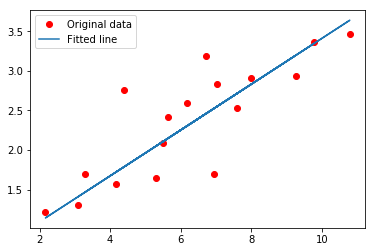

In [6]:
# compute
# Start training
with tf.Session() as sess:
    #initialize the w,b by random
    values = {w:rng.randn(),b:rng.randn()}
    # Fit all training data
    t_start = time.time()
    for epoch in range(training_epochs):
        for (X, Y) in zip(train_X, train_Y):
            values[x] = X
            values[y] = Y
            #compute the gradients
            cost_np,grad_w_np,grad_b_np = sess.run([cost,grad_w,grad_b], feed_dict=values)
            #update the parameters
            values[w] -= learning_rate * grad_w_np
            values[b] -= learning_rate * grad_b_np

        #Display logs per epoch step
        #print (epoch+1) % display_step
        #print values
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict=values)
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(w,feed_dict=values), "b=", sess.run(b,feed_dict=values)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    values[x] = train_X
    values[y] = train_Y
    print values
    training_cost = sess.run(cost, feed_dict=values)
    print "Training cost=", training_cost, "w=", sess.run(w,feed_dict=values), "b=", sess.run(b,feed_dict=values), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(w,feed_dict=values) * train_X + sess.run(b,feed_dict=values), label='Fitted line')
    plt.legend()
    plt.show()


## linear regression v2

In [7]:
tf.reset_default_graph()
# define the input by placeholder
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32,name='x')
    y = tf.placeholder(tf.float32,name='y')
# define the weight
# represent the learnable paramters by tf.placeholder
with tf.variable_scope('params'):
    w = tf.Variable(rng.randn(),name='w')
    b = tf.Variable(rng.randn(),name='b')
# construct inference model
with tf.name_scope('inference'):
    y_pred = tf.multiply(w,x) + b
# Mean squared error as loss function
with tf.name_scope('loss'):
    cost = tf.reduce_sum(tf.pow(y_pred-y, 2))/(2*n_samples)
with tf.name_scope('grads'):
    grad_w,grad_b = tf.gradients(cost,[w,b])
with tf.name_scope('update_params'):
    new_w = w.assign(w-learning_rate*grad_w)
    new_b = w.assign(b-learning_rate*grad_b)
init = tf.global_variables_initializer()
tf.summary.FileWriter('linear_model_v2',tf.get_default_graph())

v3

Epoch: 0050 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0100 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0150 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0200 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0250 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0300 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0350 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0400 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0450 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0500 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0550 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0600 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0650 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0700 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0750 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0800 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0850 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0900 cost= 0.071842253 W= 0.508991 b= 1.28502
Epoch: 0950 cost= 0.071842253 W= 0.508991 b= 1

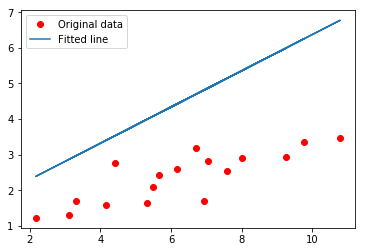

In [8]:
# compute
# Start training

with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    t_start = time.time()
    values = {}
    for epoch in range(training_epochs):
        for (X, Y) in zip(train_X, train_Y):
            values[x] = X
            values[y] = Y
            #compute the gradients
            cost_np = sess.run([cost], feed_dict=values)
            #update the parameters
            #values[w] -= learning_rate * grad_w_np
            #values[b] -= learning_rate * grad_b_np

        #Display logs per epoch step
        #print (epoch+1) % display_step
        #print values
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict=values)
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(w), "b=", sess.run(b)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    values[x] = train_X
    values[y] = train_Y
  
    training_cost = sess.run(cost, feed_dict=values)
    print "Training cost=", training_cost, "w=", sess.run(w,feed_dict=values), "b=", sess.run(b,feed_dict=values), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(w,feed_dict=values) * train_X + sess.run(b,feed_dict=values), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
tf.reset_default_graph()
# define the input by placeholder
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32,name='x')
    y = tf.placeholder(tf.float32,name='y')
# define the weight
# represent the learnable paramters by tf.placeholder
with tf.variable_scope('params'):
    w = tf.Variable(rng.randn(),name='w')
    b = tf.Variable(rng.randn(),name='b')
# construct inference model
with tf.name_scope('inference'):
    y_pred = tf.multiply(w,x) + b
# Mean squared error as loss function
with tf.name_scope('loss'):
    cost = tf.reduce_sum(tf.pow(y_pred-y, 2))/(2*n_samples)
with tf.name_scope('grads'):
    grad_w,grad_b = tf.gradients(cost,[w,b])
with tf.name_scope('update_params'):
    new_w = w.assign(w-learning_rate*grad_w)
    new_b = b.assign(b-learning_rate*grad_b)
    print new_w,new_b
    updates = tf.group(new_w,new_b)
    print updates
init = tf.global_variables_initializer()
tf.summary.FileWriter('linear_model_v2',tf.get_default_graph())

Tensor("update_params/Assign:0", shape=(), dtype=float32_ref) Tensor("update_params/Assign_1:0", shape=(), dtype=float32_ref)
name: "update_params/group_deps"
op: "NoOp"
input: "^update_params/Assign"
input: "^update_params/Assign_1"



0.0055483
Epoch: 0050 cost= 0.005548301 W= 0.210726 b= 1.08108
0.00530915
Epoch: 0100 cost= 0.005309150 W= 0.213037 b= 1.06445
0.00508904
Epoch: 0150 cost= 0.005089037 W= 0.215211 b= 1.04881
0.00488626
Epoch: 0200 cost= 0.004886260 W= 0.217256 b= 1.0341
0.0046993
Epoch: 0250 cost= 0.004699301 W= 0.219179 b= 1.02026
0.00452679
Epoch: 0300 cost= 0.004526786 W= 0.220988 b= 1.00725
0.00436747
Epoch: 0350 cost= 0.004367469 W= 0.22269 b= 0.995011
0.00422023
Epoch: 0400 cost= 0.004220233 W= 0.22429 b= 0.983499
0.00408405
Epoch: 0450 cost= 0.004084054 W= 0.225795 b= 0.972672
0.00395801
Epoch: 0500 cost= 0.003958011 W= 0.227211 b= 0.962488
0.0038413
Epoch: 0550 cost= 0.003841298 W= 0.228542 b= 0.952913
0.00373312
Epoch: 0600 cost= 0.003733117 W= 0.229793 b= 0.943907
0.00363279
Epoch: 0650 cost= 0.003632791 W= 0.230971 b= 0.935437
0.00353967
Epoch: 0700 cost= 0.003539667 W= 0.232078 b= 0.92747
0.00345319
Epoch: 0750 cost= 0.003453186 W= 0.23312 b= 0.919978
0.00337283
Epoch: 0800 cost= 0.00337282

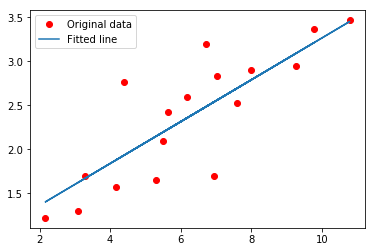

In [10]:
# compute
# Start training

with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    t_start = time.time()
    values = {}
    for epoch in range(training_epochs):
        for (X, Y) in zip(train_X, train_Y):
            values[x] = X
            values[y] = Y
            #compute the gradients
            cost_np,_ = sess.run([cost,updates], feed_dict=values)
            #print(w_np,b_np)
            #print cost_np
            #update the parameters
            #values[w] -= learning_rate * grad_w_np
            #values[b] -= learning_rate * grad_b_np

        #Display logs per epoch step
        #print (epoch+1) % display_step
        #print values
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict=values)
            print(c)
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(w), "b=", sess.run(b)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    values[x] = train_X
    values[y] = train_Y
  
    training_cost = sess.run(cost, feed_dict=values)
    print "Training cost=", training_cost, "w=", sess.run(w,feed_dict=values), "b=", sess.run(b,feed_dict=values), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(w,feed_dict=values) * train_X + sess.run(b,feed_dict=values), label='Fitted line')
    plt.legend()
    plt.show()

In [13]:
tf.reset_default_graph()
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [14]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [18]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2.*n_samples)
print n_samples
#cost = tf.reduce_sum(tf.pow(y_pred-y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

17


In [19]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.079245120 W= 0.277222 b= 0.609393
Epoch: 0100 cost= 0.078977935 W= 0.275593 b= 0.621037
Epoch: 0150 cost= 0.078742325 W= 0.274062 b= 0.631974
Epoch: 0200 cost= 0.078534484 W= 0.272625 b= 0.642249
Epoch: 0250 cost= 0.078351215 W= 0.271274 b= 0.651901
Epoch: 0300 cost= 0.078189649 W= 0.270006 b= 0.660967
Epoch: 0350 cost= 0.078047112 W= 0.268814 b= 0.669485
Epoch: 0400 cost= 0.077921450 W= 0.267694 b= 0.677487
Epoch: 0450 cost= 0.077810638 W= 0.266642 b= 0.685003
Epoch: 0500 cost= 0.077712923 W= 0.265654 b= 0.692063
Epoch: 0550 cost= 0.077626802 W= 0.264726 b= 0.698696
Epoch: 0600 cost= 0.077550873 W= 0.263854 b= 0.704927
Epoch: 0650 cost= 0.077483937 W= 0.263035 b= 0.710781
Epoch: 0700 cost= 0.077424921 W= 0.262266 b= 0.716279
Epoch: 0750 cost= 0.077372931 W= 0.261543 b= 0.721446
Epoch: 0800 cost= 0.077327058 W= 0.260864 b= 0.726299
Epoch: 0850 cost= 0.077286676 W= 0.260226 b= 0.730858
Epoch: 0900 cost= 0.077251084 W= 0.259627 b= 0.73514
Epoch: 0950 cost= 0.077219732

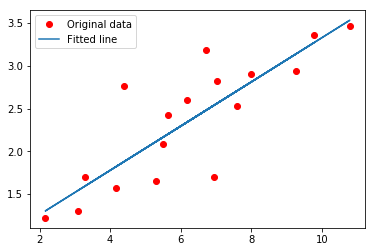

In [20]:
# Start training
with tf.Session() as sess:
    t_start = time.time()
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            #print x
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c,_ = sess.run([cost,optimizer], feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [ ]:
# Regression result